## Exploratory Data Analysis :

In [348]:
#importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif
from scipy.sparse import hstack
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
SEED = 42
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [254]:
#Reading the dataset
data = pd.read_csv("watson_healthcare_modified.csv")

In [255]:
#printing first 5 rows
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [256]:
#checking the shape of the data
data.shape

(1676, 35)

In [257]:
#checking the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

Observation : We notice that none of the fields have Nan values

In [258]:
# printing no. of unique values
print('\nNo. of Unique values:')
print(data.nunique())


No. of Unique values:
EmployeeID                  1676
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        5
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
Shift                          4
TotalWorkingYears             40
TrainingTimesLastYea

No     1477
Yes     199
Name: Attrition, dtype: int64
No     0.881265
Yes    0.118735
Name: Attrition, dtype: float64


Text(0.5, 1.0, 'Attrition')

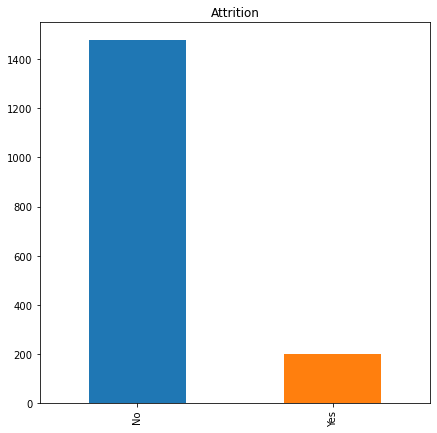

In [259]:
#checking whether the dataset is balanced or imbalanced
print(data.Attrition.value_counts())
print(data.Attrition.value_counts(normalize=True))
data['Attrition'].value_counts().plot(kind='bar', color=('C0','C1')).set_title('Attrition')

Observation : 12% of the total employees left the company, while the other 88% of the employees retained in the same company. The given dataset is imbalanced.

Finding correlation between variables :

In [260]:
data_correlation = data.corr()

<AxesSubplot:>

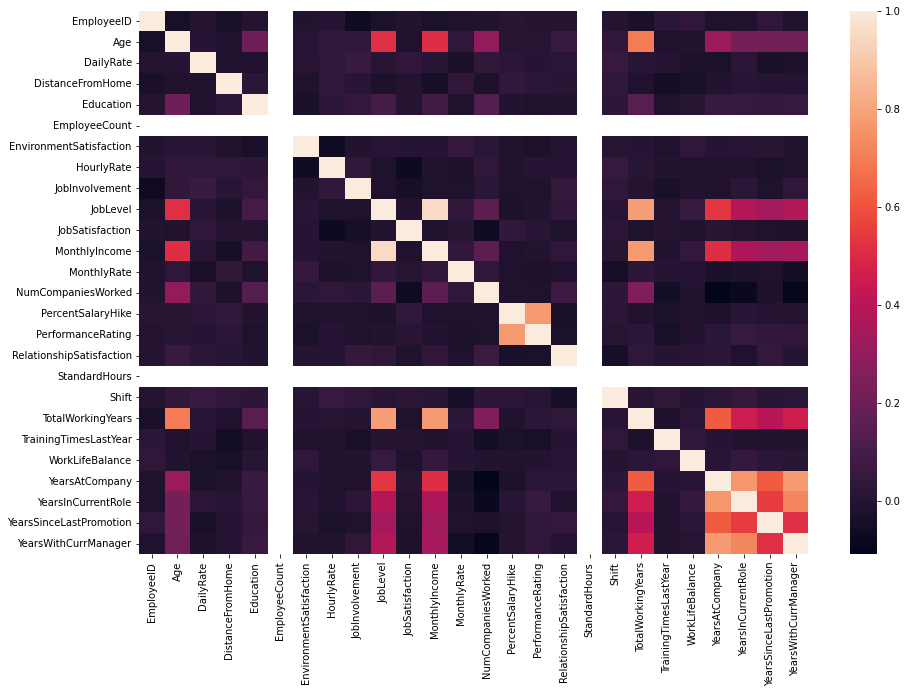

In [261]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

Observations :
1.Monthly income is highly correlated with Job level & Total working years.
2.Job level is highly correlated with total working years.
3.Age is correlated with the Total working years.
4.Years at company is highly correlated with years in cuurent role & years with current manager

### Univariate Analysis :

#### Age :

(array([  0.,  18., 367., 701., 395., 190.,   5.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 7 artists>)

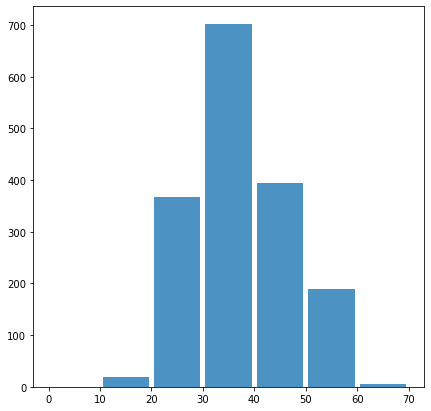

In [262]:
# distribution of age
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(data['Age'],bins=np.arange(0,80,10),alpha=0.8,rwidth=0.9)

Observation : Out of all the employees there are more employees in the age range of 30 to 40.

In [263]:
positive_attrition_df = data.loc[data['Attrition'] == 'Yes']
negative_attrition_df = data.loc[data['Attrition'] == 'No']

(array([ 0., 12., 89., 69., 17., 12.,  0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 7 artists>)

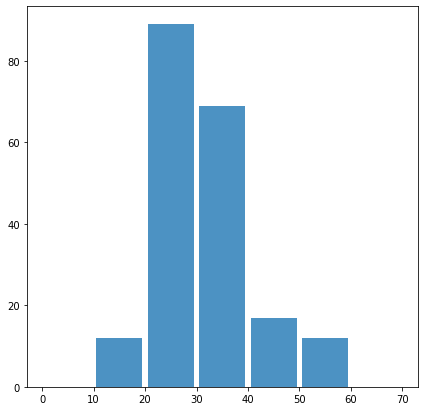

In [264]:
#checking which age group are likely to leave the company
plt.hist(positive_attrition_df['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9)

Observation : Employees who's age is in the range of 20 to 40 are more likely to leave the company

#### Business Travel : 

In [265]:
print(data['BusinessTravel'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


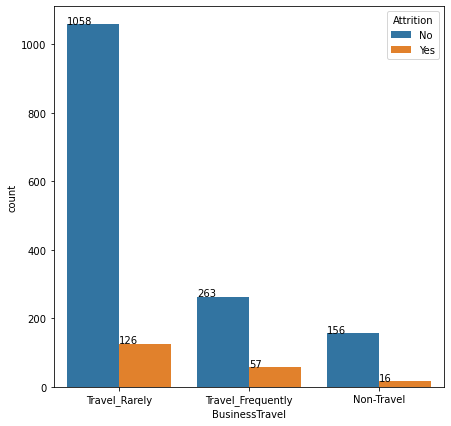

In [266]:
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=data)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Observation : From the above plot, travel can not be a factor for attrition. Employee who travel rarely are likely to quit more

#### Department :

In [267]:
print(data['Department'].unique())

['Cardiology' 'Maternity' 'Neurology']


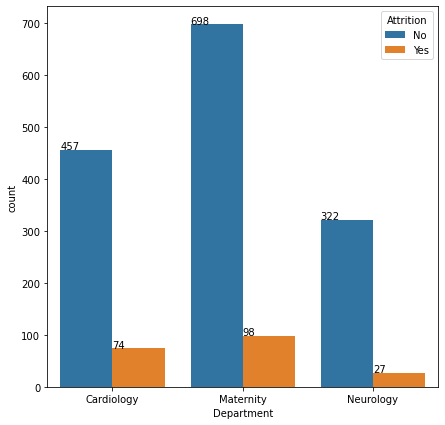

In [268]:
ax = sns.countplot(x="Department", hue="Attrition", data=data)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Observation : From the above plot, department cannot be a factor for attrition.

#### Distance from home :

(array([965., 297., 215.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 7 artists>)

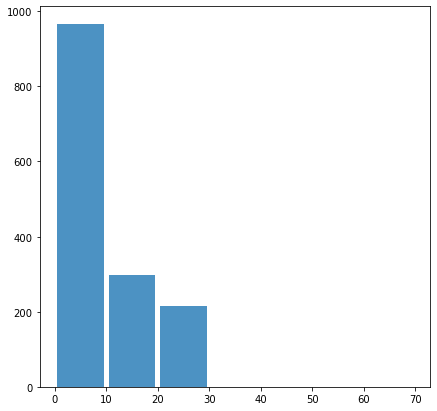

In [269]:
plt.hist(negative_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9)

(array([105.,  44.,  50.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 7 artists>)

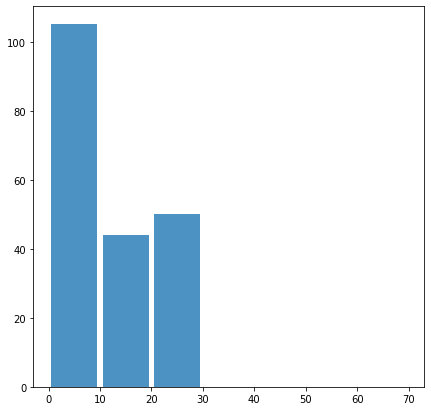

In [270]:
plt.hist(positive_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9)

Observation : people who live near by 0-10 miles are likely to quit more based on the data

#### Education :

In [271]:
print(data['Education'].unique())

[2 1 4 3 5]


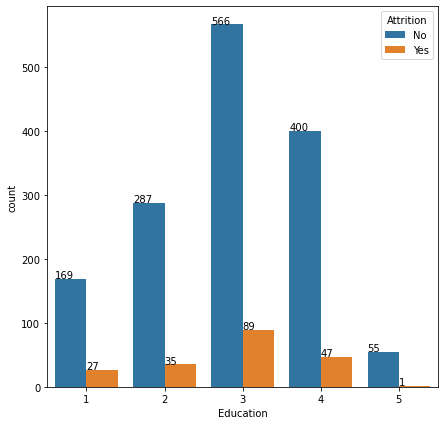

In [272]:
ax = sns.countplot(x="Education", hue="Attrition", data=data)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Observation: Employees with education level 3 & 4 are likely to quit more than other education level employees in the company

#### Gender :

In [273]:
print(data['Gender'].unique())

['Female' 'Male']


In [274]:
print(data['Gender'].value_counts())

Male      998
Female    678
Name: Gender, dtype: int64


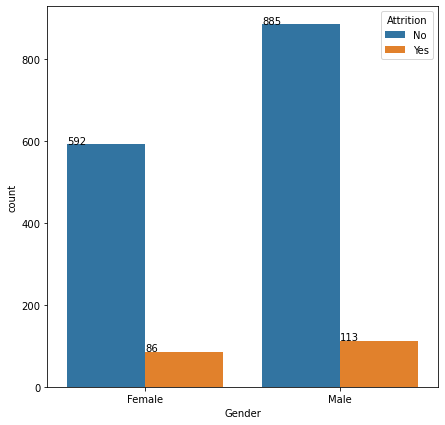

In [275]:
ax = sns.countplot(x="Gender", hue="Attrition", data=data)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Observation : From the above plot, we can infer that male employees are likely to leave organization as they amount to 59% compared to female.

#### Job role :

In [276]:
print(data['JobRole'].unique())

['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin']


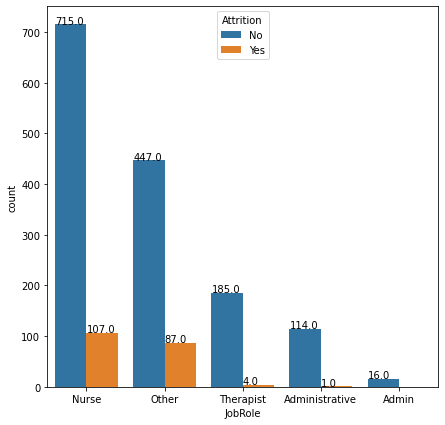

In [277]:
ax = sns.countplot(x="JobRole", hue="Attrition", data=data)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Observation : Most employees with 'Nurse' job role and 'other' job role tend to quit their jobs based on the above plot.

#### Marital Status :

In [278]:
print(data['MaritalStatus'].unique())

['Single' 'Married' 'Divorced']


In [279]:
print(data['MaritalStatus'].value_counts())

Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64


In [280]:
print(positive_attrition_df['MaritalStatus'].value_counts())

Single      114
Married      61
Divorced     24
Name: MaritalStatus, dtype: int64


<AxesSubplot:>

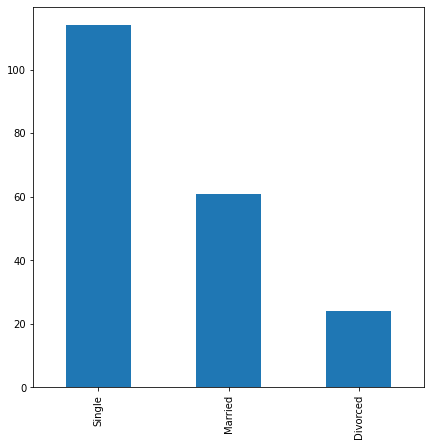

In [281]:
positive_attrition_df['MaritalStatus'].value_counts().plot(kind='bar')

Observation : Most of the employees who are single are tend to quit more

#### Monthly Income :

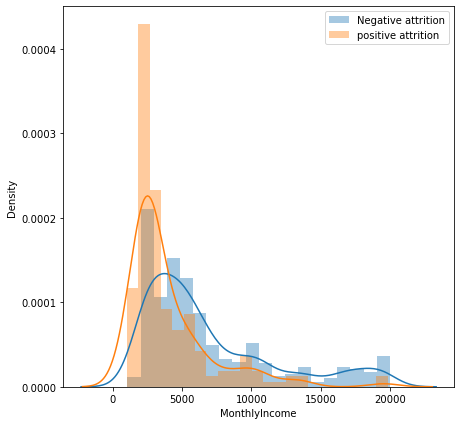

In [282]:
sns.distplot(negative_attrition_df['MonthlyIncome'], label='Negative attrition')
sns.distplot(positive_attrition_df['MonthlyIncome'], label='positive attrition')
plt.legend()

Observation : From the above plot, employees who are paid less are more likely to leave the company

#### Hourly rate :

65.739336492891
63.472361809045225


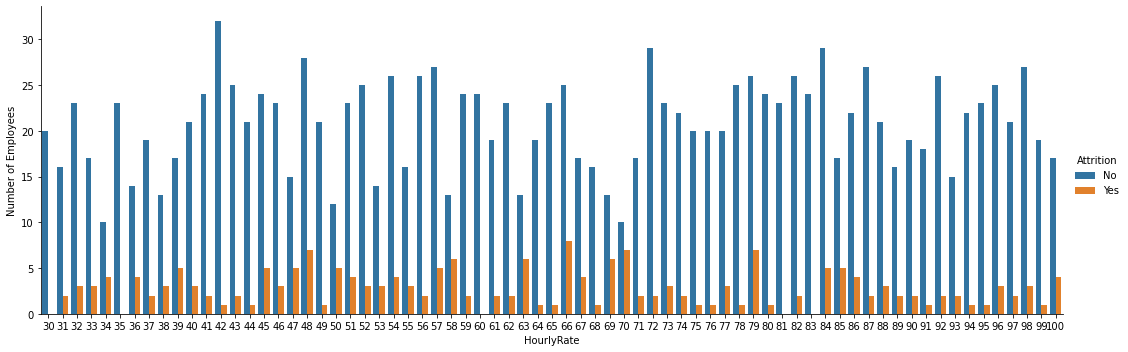

In [283]:
# employee distribution by HourlyRate, with distinct Attrition classes
print(data[data.Attrition=='No']['HourlyRate'].mean())
print(data[data.Attrition=='Yes']['HourlyRate'].mean())
sns.axes_style('whitegrid')
sns.catplot('HourlyRate', data=data, aspect=3, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('Number of Employees')

Observation : Both attrition classes have similar distribution at different hourly rates ranging from 30 to 100. Hourly rate seems to have very less effect on employee attrition.

#### Overtime :

In [284]:
print(data['OverTime'].unique())

['Yes' 'No']


Text(0.5, 1.0, 'Attrition')

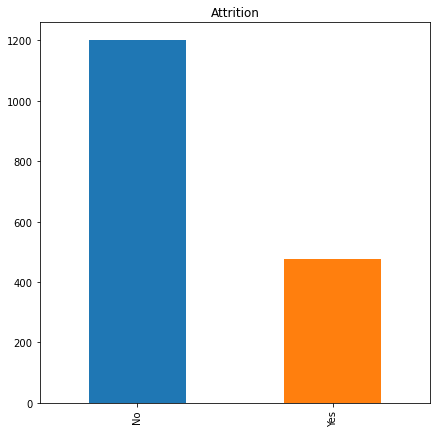

In [285]:
data['OverTime'].value_counts().plot(kind='bar', color=('C0','C1')).set_title('Attrition')

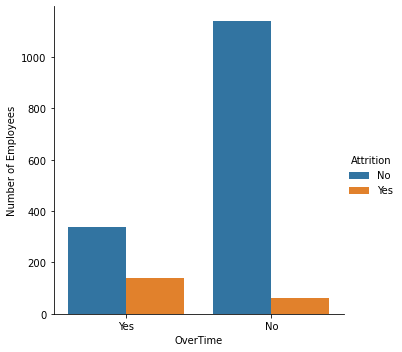

In [286]:
# employee distribution by OverTime, with distinct Attrition classes
sns.axes_style('whitegrid')
sns.factorplot("OverTime", data=data, aspect=1, kind='count', hue='Attrition').set_ylabels('Number of Employees')

Observation : The no. of employees who tend to do overtime has the high number in employee attrition than the employees who don't do overtime.So, overtime has little effect on employee attrition.

## Extracting target label from input data : 

In [287]:
data['Attrition']=data['Attrition'].replace('Yes', 1)
data['Attrition']=data['Attrition'].replace('No', 0)

In [288]:
target_data = data[['Attrition']]

In [289]:
target_data.shape

(1676, 1)

In [290]:
data = data.drop(['Attrition'], axis=1)

In [291]:
data.shape

(1676, 34)

## Categorical Encoding :

Business Travel :

In [292]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [293]:
data['BusinessTravel']=data['BusinessTravel'].replace('Non-Travel', 'Non_Travel')

In [357]:
dum_BusinessTravel = pd.get_dummies(data['BusinessTravel'])

In [358]:
dum_BusinessTravel

,Non_Travel,Travel_Frequently,Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
1671,0,0,1
1672,0,0,1
1673,0,0,1
1674,0,0,1


Department :

In [296]:
data['Department'].unique()

array(['Cardiology', 'Maternity', 'Neurology'], dtype=object)

In [359]:
dum_Department = pd.get_dummies(data['Department'])
dum_Department

,Cardiology,Maternity,Neurology
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1671,0,0,1
1672,1,0,0
1673,0,1,0
1674,0,0,1


Education Field :

In [299]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [300]:
data['EducationField']=data['EducationField'].replace('Life Sciences', 'Life_Sciences')
data['EducationField']=data['EducationField'].replace('Technical Degree', 'Technical_Degree')
data['EducationField']=data['EducationField'].replace('Human Resources', 'Human_Resources')

In [360]:
dum_EducationField = pd.get_dummies(data['EducationField'])
dum_EducationField

,Human_Resources,Life_Sciences,Marketing,Medical,Other,Technical_Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
1671,0,0,0,0,0,1
1672,0,0,1,0,0,0
1673,0,1,0,0,0,0
1674,0,1,0,0,0,0


Gender :

In [303]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [361]:
dum_Gender = pd.get_dummies(data['Gender'])
dum_Gender

,Female,Male
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
1671,0,1
1672,1,0
1673,1,0
1674,1,0


Job Role :

In [305]:
data['JobRole'].unique()

array(['Nurse', 'Other', 'Therapist', 'Administrative', 'Admin'],
      dtype=object)

In [363]:
dum_JobRole = pd.get_dummies(data['JobRole'])
dum_JobRole

,Admin,Administrative,Nurse,Other,Therapist
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
1671,0,0,1,0,0
1672,0,0,1,0,0
1673,0,0,0,1,0
1674,0,0,0,0,1


Marital Status :

In [307]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [364]:
dum_MaritalStatus = pd.get_dummies(data['MaritalStatus'])
dum_MaritalStatus

,Divorced,Married,Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
1671,0,0,1
1672,0,1,0
1673,0,0,1
1674,0,1,0


Over Time :

In [365]:
dum_OverTime = pd.get_dummies(data['OverTime'])
dum_OverTime

,No,Yes
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
1671,0,1
1672,0,1
1673,1,0
1674,1,0


## Numerical Encoding :

In [310]:
normalizer = Normalizer()
normalizer.fit(data['Age'].values.reshape(-1,1))
Age_encoded = normalizer.transform(data['Age'].values.reshape(-1,1))

In [311]:
normalizer = Normalizer()
normalizer.fit(data['DailyRate'].values.reshape(-1,1))
DailyRate_encoded = normalizer.transform(data['DailyRate'].values.reshape(-1,1))

In [312]:
normalizer = Normalizer()
normalizer.fit(data['DistanceFromHome'].values.reshape(-1,1))
DistanceFromHome_encoded = normalizer.transform(data['DistanceFromHome'].values.reshape(-1,1))

In [313]:
normalizer = Normalizer()
normalizer.fit(data['HourlyRate'].values.reshape(-1,1))
HourlyRate_encoded = normalizer.transform(data['HourlyRate'].values.reshape(-1,1))

In [314]:
normalizer = Normalizer()
normalizer.fit(data['MonthlyIncome'].values.reshape(-1,1))
MonthlyIncome_encoded = normalizer.transform(data['MonthlyIncome'].values.reshape(-1,1))

In [315]:
normalizer = Normalizer()
normalizer.fit(data['MonthlyRate'].values.reshape(-1,1))
MonthlyRate_encoded = normalizer.transform(data['MonthlyRate'].values.reshape(-1,1))

In [316]:
normalizer = Normalizer()
normalizer.fit(data['NumCompaniesWorked'].values.reshape(-1,1))
NumCompaniesWorked_encoded = normalizer.transform(data['NumCompaniesWorked'].values.reshape(-1,1))

In [317]:
normalizer = Normalizer()
normalizer.fit(data['PercentSalaryHike'].values.reshape(-1,1))
PercentSalaryHike_encoded = normalizer.transform(data['PercentSalaryHike'].values.reshape(-1,1))

In [318]:
normalizer = Normalizer()
normalizer.fit(data['TotalWorkingYears'].values.reshape(-1,1))
TotalWorkingYears_encoded = normalizer.transform(data['TotalWorkingYears'].values.reshape(-1,1))

In [319]:
normalizer = Normalizer()
normalizer.fit(data['YearsAtCompany'].values.reshape(-1,1))
YearsAtCompany_encoded = normalizer.transform(data['YearsAtCompany'].values.reshape(-1,1))

In [320]:
normalizer = Normalizer()
normalizer.fit(data['YearsInCurrentRole'].values.reshape(-1,1))
YearsInCurrentRole_encoded = normalizer.transform(data['YearsInCurrentRole'].values.reshape(-1,1))

In [321]:
normalizer = Normalizer()
normalizer.fit(data['YearsSinceLastPromotion'].values.reshape(-1,1))
YearsSinceLastPromotion_encoded = normalizer.transform(data['YearsSinceLastPromotion'].values.reshape(-1,1))

In [322]:
normalizer = Normalizer()
normalizer.fit(data['YearsWithCurrManager'].values.reshape(-1,1))
YearsWithCurrManager_encoded = normalizer.transform(data['YearsWithCurrManager'].values.reshape(-1,1))

In [375]:
EnvironmentSatisfaction = np.array(data['EnvironmentSatisfaction'])
EnvironmentSatisfaction = np.expand_dims(EnvironmentSatisfaction, -1)
EnvironmentSatisfaction.shape

(1676, 1)

In [376]:
Education = np.array(data['Education'])
Education = np.expand_dims(Education, -1)
Education.shape

(1676, 1)

In [374]:
JobInvolvement= np.array(data['JobInvolvement'])
JobInvolvement = np.expand_dims(JobInvolvement, -1)
JobLevel= np.array(data['JobLevel'])
JobLevel = np.expand_dims(JobLevel, -1)
JobSatisfaction = np.array(data['JobSatisfaction'])
JobSatisfaction = np.expand_dims(JobSatisfaction, -1)
PerformanceRating = np.array(data['PerformanceRating'])
PerformanceRating = np.expand_dims(PerformanceRating, -1)
RelationshipSatisfaction = np.array(data['RelationshipSatisfaction'])
RelationshipSatisfaction = np.expand_dims(RelationshipSatisfaction, -1)
Shift = np.array(data['Shift'])
Shift = np.expand_dims(Shift, -1)
WorkLifeBalance = np.array(data['WorkLifeBalance'])
WorkLifeBalance = np.expand_dims(WorkLifeBalance, -1)

## Concatenating all the features :

In [377]:
data_encoded = hstack((Age_encoded,BusinessTravel_ohe,DailyRate_encoded,dum_Department,DistanceFromHome_encoded,Education,dum_EducationField,EnvironmentSatisfaction,dum_Gender,HourlyRate_encoded,JobInvolvement,JobLevel,dum_JobRole,JobSatisfaction,dum_MaritalStatus,MonthlyIncome_encoded,MonthlyRate_encoded,NumCompaniesWorked_encoded,dum_OverTime,PercentSalaryHike_encoded,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears_encoded,WorkLifeBalance,YearsAtCompany_encoded,YearsInCurrentRole_encoded,YearsSinceLastPromotion_encoded,YearsWithCurrManager_encoded)).tocsr()

## Feature selection :

In [378]:
col_values = ['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','Shift','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [379]:
len(col_values)

28

Mutual Information : If Mutual information is 0,X and Y are independent.If Mutual information is 1, X and Y are dependent.

In [380]:
#gives top 10 features having maximum mutual information value
feature_scores = mutual_info_classif(data_encoded, target_data)
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    print(fname, score)

Shift 0.03462333465684487
RelationshipSatisfaction 0.013385135958341763
YearsSinceLastPromotion 0.008108135172653083
WorkLifeBalance 0.006730559378233583
NumCompaniesWorked 0.006318879189306986
YearsInCurrentRole 0.0041698910123558475
DailyRate 0.003632508425808076
HourlyRate 0.003485730118248003
YearsWithCurrManager 0.003466491701512836
EnvironmentSatisfaction 0.0023495744470875754


chi-square test :chi-square test is applied to test the independence of two events.

In [381]:
#gives top 10 features having maximum chi-square value
feature_scores = chi2(data_encoded, target_data)[0]
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    print(fname, score)

Shift 43.31388452831898
YearsSinceLastPromotion 17.195639368313845
WorkLifeBalance 13.30788294301865
DailyRate 10.786731388833127
YearsInCurrentRole 9.963921453555042
RelationshipSatisfaction 8.641858416627523
NumCompaniesWorked 7.623242657595182
EnvironmentSatisfaction 5.708681854935265
YearsWithCurrManager 4.997906871063573
MaritalStatus 2.294831696716124


Based on the above 2 tests , we can select the below features for model development.

'Age','DistanceFromHome','Gender','JobRole','MonthlyIncome','MonthlyRate' ,'OverTime','PercentSalaryHike','PerformanceRating', 'YearsAtCompany','Shift','YearsSinceLastPromotion','WorkLifeBalance','YearsInCurrentRole'

In [383]:
data_selected = hstack((Age_encoded,DistanceFromHome_encoded,Gender_ohe,dum_JobRole,MonthlyIncome_encoded,MonthlyRate_encoded,dum_OverTime,PercentSalaryHike_encoded,PerformanceRating,YearsAtCompany_encoded,Shift,YearsSinceLastPromotion_encoded,WorkLifeBalance,YearsInCurrentRole_encoded))

In [406]:
features = ['Age','DistanceFromHome','Gender_Female','Gender_Male','JobRole_Admin','JobRole_Administrative','JobRole_Nurse','Jobrole_Other','JobRole_Therapist','MonthlyIncome','MonthlyRate' ,'OverTime_No','OverTime_Yes','PercentSalaryHike','PerformanceRating', 'YearsAtCompany','Shift','YearsSinceLastPromotion','WorkLifeBalance','YearsInCurrentRole']

In [385]:
len(features)

14

## Split into train,test data

In [386]:
# split data to 80:20 ratio for train/test
X_train, X_test, y_train, y_test = train_test_split(data_selected, target_data, test_size=.2, random_state=SEED, stratify=target_data)

In [387]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1340, 20)
y_train (1340, 1)
X_test (336, 20)
y_test (336, 1)


In [388]:
def performance(cv,scoring):
    
    kn = KNeighborsClassifier()
    s = cross_val_score(kn, data_selected, target_data, cv=cv, scoring=scoring)
    print("{} Score:\t{:0.3} ± {:0.3}".format("K Nearest Neighbors", s.mean().round(3), s.std().round(3)))
    
    lr = LogisticRegression(class_weight='balanced',random_state=99)
    s = cross_val_score(lr, data_selected, target_data, cv=cv, scoring=scoring)
    print("{} Score:\t{:0.3} ± {:0.3}".format("Logistic Regression", s.mean().round(3), s.std().round(3)))

    dt = DecisionTreeClassifier(class_weight='balanced',random_state=99)
    s = cross_val_score(dt, data_selected, target_data, cv=cv, scoring=scoring)
    print("{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", s.mean().round(3), s.std().round(3)))

    rf = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=99)
    s = cross_val_score(rf, data_selected, target_data, cv=cv, scoring=scoring)
    print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3)))

    gb = GradientBoostingClassifier(n_estimators=100,random_state=99)
    s = cross_val_score(gb, data_selected, target_data, cv=cv, scoring=scoring)
    print("{} Score:\t{:0.3} ± {:0.3}".format("Gradient Boosting", s.mean().round(3), s.std().round(3)))

In [389]:
cv = StratifiedKFold(n_splits=5,random_state=SEED, shuffle=True)
scoring = 'accuracy'
print("Accuracy :")
performance(cv,scoring)

Accuracy :
K Nearest Neighbors Score:	0.879 ± 0.01
Logistic Regression Score:	0.785 ± 0.014
Decision Tree Score:	0.803 ± 0.028
Random Forest Score:	0.847 ± 0.016
Gradient Boosting Score:	0.891 ± 0.008


In [390]:
scoring = 'f1'
print("F1 score:")
performance(cv,scoring)

F1 score:
K Nearest Neighbors Score:	0.337 ± 0.082
Logistic Regression Score:	0.459 ± 0.023
Decision Tree Score:	0.411 ± 0.029
Random Forest Score:	0.454 ± 0.025
Gradient Boosting Score:	0.388 ± 0.057


In [391]:
scoring = 'precision'
print("Precision :")
performance(cv,scoring)

Precision :
K Nearest Neighbors Score:	0.477 ± 0.07
Logistic Regression Score:	0.327 ± 0.018
Decision Tree Score:	0.323 ± 0.039
Random Forest Score:	0.398 ± 0.037
Gradient Boosting Score:	0.584 ± 0.065


In [392]:
scoring = 'recall'
print("Recall :")
performance(cv,scoring)

Recall :
K Nearest Neighbors Score:	0.266 ± 0.087
Logistic Regression Score:	0.769 ± 0.047
Decision Tree Score:	0.573 ± 0.045
Random Forest Score:	0.538 ± 0.065
Gradient Boosting Score:	0.291 ± 0.051


Observations :

1. Accuracy is the best performance metric for this case.

2. Among 5 algorithms Gradient boosting model performs well with  accuracy performance metric

## Modelling :

In [393]:
gb = GradientBoostingClassifier(n_estimators=100,random_state=99)
y_pred = gb.fit(X_train,y_train).predict(X_test)

In [394]:
print('Gradient boosting Classification Report \n')
print(classification_report(y_test, y_pred) + '\n')
print('Gradient boosting Confusion Matrix \n')
confusion_matrix = np.array(confusion_matrix(y_test, y_pred))
confusion = pd.DataFrame(confusion_matrix, index=['Attrition_no', 'Attrition_yes'],columns=['predicted_Attrition_no','predicted_Attrition_yes'])
print(confusion)

Gradient boosting Classification Report 

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       296
           1       0.50      0.38      0.43        40

    accuracy                           0.88       336
   macro avg       0.71      0.66      0.68       336
weighted avg       0.87      0.88      0.87       336


Gradient boosting Confusion Matrix 

               predicted_Attrition_no  predicted_Attrition_yes
Attrition_no                      281                       15
Attrition_yes                      25                       15


In [407]:
features = pd.Series(gb.feature_importances_, index = pd.Series(features).apply(lambda x: x.lower()))
features.sort_values(ascending=True,inplace=True)

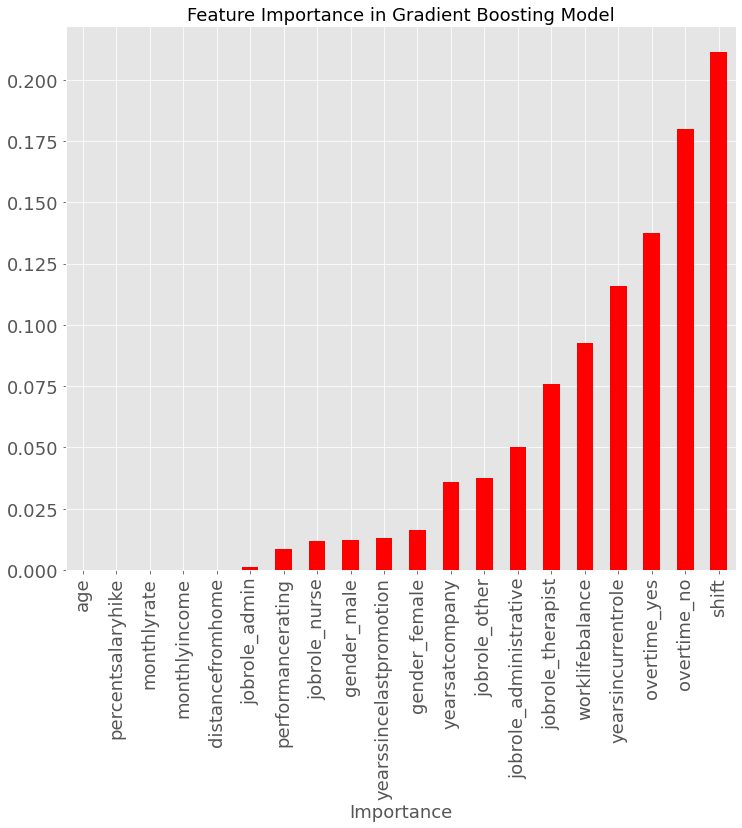

In [408]:
plt.style.use('ggplot')
features.plot(kind = "bar", color='r', figsize=(12,10),fontsize=18)
plt.xlabel('Importance',fontsize=18)
plt.title("Feature Importance in Gradient Boosting Model", fontsize=18);

Observations :

1. Shift,Overtime,Years in current role,work life balance are key features for the employee retention based on the above plot.

2. We can further improve the model performance by hyper paramenter tuning,ensembling or stacking to better allow for generalization to the unseen data.

3. I can further extend by applying XGBoost or LightGBM and they may have provide improvement in model performance

4.Due to the time constraint,i intentionally ignored to use regularization techniques like Lasso and Ridge .

5.SelectKBest, RFECV(recursive feature elimination and cross-validated selection) can also be used to fine tune the hyper parameters which result in improved performace

6.Also all the models I used were straight out of the box with default values and no hyperparameter tuning was employed.

### Ways to reduce employee attrition :

1. We can reduce the employee attrition by implementing the extra pay for the overtime

2.By updating and increasing the pay for the roles of the employees periodically based on their performance

3.By implementing work life balance to boost the confidence and performance of the employee